Erro ao obter cotações: HTTPSConnectionPool(host='economia.awesomeapi.com.br', port=443): Max retries exceeded with url: /json/last/USD-BRL,EUR-BRL,GBP-BRL (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)')))
Selic: 10.75%
IPCA: 0.44%
CDI: 0.52%
IGP-M: 0.62%


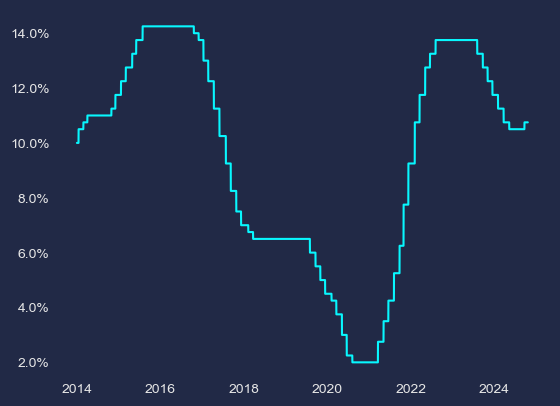

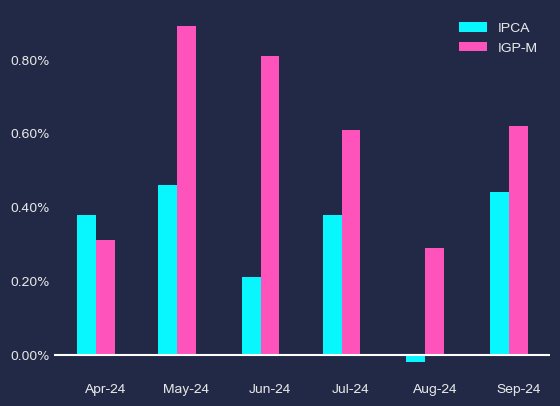

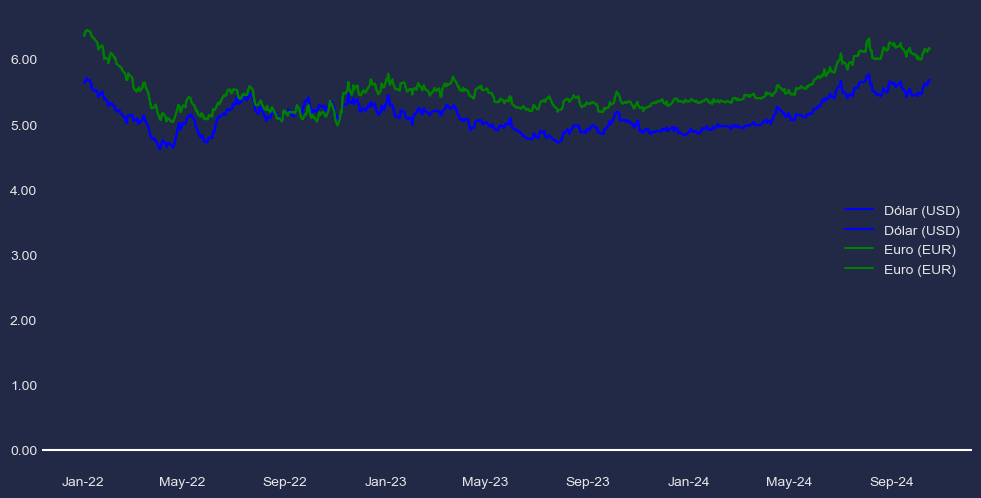

NameError: name 'dolar' is not defined

In [1]:
# ----------------------------------------
# Enviar Dados Econômicos por Email
# ----------------------------------------

#!pip install python-bcb
#!pip install mplcyberpunk
import requests

import matplotlib as mpl
import mplcyberpunk
from bcb import currency
from bcb import sgs
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from matplotlib.dates import date2num

from datetime import datetime, timedelta
import pandas as pd  # Caso você use pandas para manipular o DataFrame

import os
import smtplib
from email.message import EmailMessage

plt.style.use("cyberpunk")

# --------------------------
# série da Selic-------------

selic = sgs.get({'selic': 432}, start='2014-01-01')
# gerar gráfico---------------
fig, ax = plt.subplots()

plt.style.use("cyberpunk")

ax.plot(selic.index, selic['selic'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.grid(False)
plt.savefig('selic.png', dpi=300)
#plt.show()

# --------------------------
# Dolar, Euro e Libra-------------
# def get_exchange_rates():
try:
    url = 'https://economia.awesomeapi.com.br/json/last/USD-BRL,EUR-BRL,GBP-BRL'
    response = requests.get(url)
    data = response.json()

    dolar = data['USDBRL']['bid']
    euro = data['EURBRL']['bid']
    libra = data['GBPBRL']['bid']

    print(f'Cotação do Dólar: R$ {dolar}')
    print(f'Cotação do Euro: R$ {euro}')
    print(f'Cotação da Libra: R$ {libra}')

except requests.exceptions.RequestException as e:
    print(f'Erro ao obter cotações: {e}')
# get_exchange_rates()

# ---TAXAS-----------------------
# IPCA, Selic, CDI e IGP_M-------------
try:
    # URLs específicas para cada taxa usando o API do Banco Central
    url_selic = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.432/dados/ultimos/1?formato=json'
    url_ipca = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados/ultimos/1?formato=json'
    url_cdi = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.4390/dados/ultimos/1?formato=json'
    url_igp_m = 'https://api.bcb.gov.br/dados/serie/bcdata.sgs.189/dados/ultimos/1?formato=json'

    # Requisições para cada taxa
    response_selic = requests.get(url_selic)
    taxa_selic = response_selic.json()[0]['valor']
    print(f'Selic: {taxa_selic}%')

    response_ipca = requests.get(url_ipca)
    ipca = response_ipca.json()[0]['valor']
    print(f'IPCA: {ipca}%')

    response_cdi = requests.get(url_cdi)
    cdi = response_cdi.json()[0]['valor']
    print(f'CDI: {cdi}%')

    response_igp_m = requests.get(url_igp_m)
    igp_m = response_igp_m.json()[0]['valor']
    print(f'IGP-M: {igp_m}%')

    # return selic, ipca, cdi, igp_m

except requests.exceptions.RequestException as e:
    print(f'Erro ao obter taxas de mercado: {e}')
    # return None, None, None, None

# --------------------------
# série do IPCA e IGP-M-------------
hoje = datetime.now()
um_ano_atras = hoje - timedelta(days=366)

inflacao_grafico = sgs.get(
    {'ipca': 433, 'igp-m': 189}, start=um_ano_atras + timedelta(180))
# inflacao
datas_numericas = date2num(inflacao_grafico.index)
# gerar gráfico---------------
fig, ax = plt.subplots()

ax.bar(datas_numericas-7, inflacao_grafico['ipca'], label="IPCA", width=7)
ax.bar(datas_numericas, inflacao_grafico['igp-m'], label="IGP-M", width=7)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis_date()
formato_data = mdates.DateFormatter('%b-%y')
ax.xaxis.set_major_formatter(formato_data)
ax.grid(False)
plt.axhline(y=0, color='w')
plt.legend()
plt.savefig('inflacao.png', dpi=300)
#plt.show()

# -----------------------------------
# Dolar e EUR------------------------
# Calcular a data final como um dia antes da data atual
end_date = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')

# Supomos que 'currency' seja o objeto ou a API que você está usando para pegar os dados
df = currency.get(['USD', 'EUR'],
                  start='2022-01-01',
                  end=end_date,
                  side='both')

# Salvando as cotações em um arquivo Excel
file_name = "cotacoes_dolar_euro.xlsx"
df.to_excel(file_name)
# Criando e salvando o gráfico de cotações
# Mantém o mesmo tamanho que o gráfico de inflação
fig, ax = plt.subplots(figsize=(12, 6))

# Plotando as cotações
plt.plot(df.index, df['USD'], label='Dólar (USD)', color='blue')
plt.plot(df.index, df['EUR'], label='Euro (EUR)', color='green')

# Formatação dos eixos
# ax.set_xlabel('Data')
# ax.set_ylabel('Cotação')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter(
    '{x:.2f}'))  # Formatação para 2 casas decimais
ax.xaxis_date()
formato_data = mdates.DateFormatter('%b-%y')
ax.xaxis.set_major_formatter(formato_data)
ax.grid(False)
plt.axhline(y=0, color='w')
plt.legend()
# plt.title('Cotações do Dólar e Euro')

# Nome do arquivo de imagem a ser salvo
plt.savefig("grafico_dolar_euro.png", dpi=300)
plt.show()
#plt.close()

# -----------------------------------
# Enviar EMAIl------------------------
email = "#" # ESCREVA SEU EMAIL AQUI

# with open('senha.txt') as f:
#    senha = f.readlines()
#    f.close()

# senha_do_email = senha[0]
senha_do_email = '#' # ESCREVA SUA SENHA AQUI

# Calcular a data final como um dia antes da data atual
hoje_date = (datetime.now()).strftime('%Y.%m.%d')

msg = EmailMessage()
msg['Subject'] = f'{hoje_date} Mercado Financeiro'
msg['From'] = '#' #ESCREVA SEU EMAIL AQUI
msg['To'] = '#' # OS DESTINATÁRIOS NESTE CAMPO
# msg.set_content("Segue o relatório diário")

# Corpo do e-mail em HTML
html_content = f"""
<html>
    <body>
        <h1>Cotações e Indicadores Econômicos - {hoje_date}</h1>
        <h2>Cotação USD, EUR e GBP (Gráfico)</h2>
        <p><strong>Cotação do Dólar:</strong> R$ {dolar}</p>
        <p><strong>Cotação do Euro:</strong> R$ {euro}</p>
        <p><strong>Cotação da Libra:</strong> R$ {libra}</p>
        <img src="cid:imagem1" width="550" height="350" alt="Gráfico Dolar">
        <h2>Inflação, IGP-M e CDI</h2>
        <p><strong>Taxa IPCA (Índice de Preços ao Consumidor Amplo):</strong> {ipca}%</p>
        <p><strong>Taxa IGP-M (Índice Geral de Preços do Mercado):</strong> {igp_m}%</p>
        <p><strong>Taxa CDI (Certificado de Depósito Interbancário):</strong> {cdi}%</p>
        <img src="cid:imagem2" width="550" height="350" alt="Gráfico da Inflação">
        <h1>Selic (Gráfico)</h1>
        <p><strong>Taxa Selic (Taxa básica de juros do Brasil):</strong>{taxa_selic}%</p>
        <img src="cid:imagem3" width="550" height="350" alt="Gráfico da Taxa Selic">
        <p>(Fonte: API do Banco Central)</p>
        <p>Atenciosamente,<br>Pablo Lima</p>
    </body>
</html>
"""
msg.add_alternative(html_content, subtype='html')

# Inserir a imagem da dolar ao e-mail (inline)
with open('grafico_dolar_euro.png', 'rb') as img:
    img_data = img.read()
    msg.get_payload()[0].add_related(img_data, 'image', 'png', cid='imagem1')

# Inserir a imagem da Inflação ao e-mail (inline)
with open('inflacao.png', 'rb') as img:
    img_data = img.read()
    msg.get_payload()[0].add_related(img_data, 'image', 'png', cid='imagem2')

# Inserir a imagem da Taxa Selic ao e-mail (inline)
with open('selic.png', 'rb') as img:
    img_data = img.read()
    msg.get_payload()[0].add_related(img_data, 'image', 'png', cid='imagem3')

# PDF_____________
# with open('relatorio_diario.pdf', 'rb') as content_file:
#    content = content_file.read()
#   msg.add_attachment(content, maintype='application', subtype='pdf', filename='relatorio_diario.pdf')

# PNG_____________
with open('selic.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application',
                       subtype='png', filename='selic.png')

# PNG_____________
with open('inflacao.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application',
                       subtype='png', filename='inflacao.png')

# PNG_____________
with open('grafico_dolar_euro.png', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application',
                       subtype='png', filename='grafico_dolar_euro.png')

# XLSX_____________
with open('cotacoes_dolar_euro.xlsx', 'rb') as content_file:
    content = content_file.read()
    msg.add_attachment(content, maintype='application',
                       subtype='xlsx', filename='cotacoes_dolar_euro.xlsx')

with smtplib.SMTP_SSL('smtp.gmail.com', 465) as smtp:
    smtp.login(email, senha_do_email)
    smtp.send_message(msg)

print("Email enviado com sucesso!")